In [1]:
!pip install -q datasets
!pip install transformers
!pip install yfinance numpy pandas matplotlib tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 36.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached h5py-3.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached protobuf-4.25.4-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
  Using cached werkzeug-3.0.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
from tqdm import tqdm
import gensim.downloader as api
from gensim.models import KeyedVectors
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import pprint
import seaborn as sns

# 1. One-hot encoding Example

In [2]:
# 단어 집합 (vocabulary)
vocab = ['king', 'queen', 'food', 'milk']

# One-Hot Encoding 함수
def one_hot_encode(word, vocab):
    one_hot_vector = np.zeros(len(vocab))
    index = vocab.index(word)
    one_hot_vector[index] = 1
    return one_hot_vector

# 단어들을 One-Hot Encoding으로 변환
king_vector = one_hot_encode('king', vocab)
queen_vector = one_hot_encode('queen', vocab)
food_vector = one_hot_encode('food', vocab)
milk_vector = one_hot_encode('milk', vocab)

# 벡터들 출력
print(f"'king'의 One-Hot Encoding: {king_vector}")
print(f"'queen'의 One-Hot Encoding: {queen_vector}")
print(f"'food'의 One-Hot Encoding: {food_vector}")
print(f"'milk'의 One-Hot Encoding: {milk_vector}")

'king'의 One-Hot Encoding: [1. 0. 0. 0.]
'queen'의 One-Hot Encoding: [0. 1. 0. 0.]
'food'의 One-Hot Encoding: [0. 0. 1. 0.]
'milk'의 One-Hot Encoding: [0. 0. 0. 1.]


In [3]:
# 코사인 유사도 계산
def cosine_similarity_custom(vec1, vec2):
    cos_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2)) # vec1와 vec2 내적 -> similarity
    return cos_sim

'king'과 'queen'의 유사도 (One-Hot): 0.0
'king'과 'food'의 유사도 (One-Hot): 0.0
'king'과 'milk'의 유사도 (One-Hot): 0.0


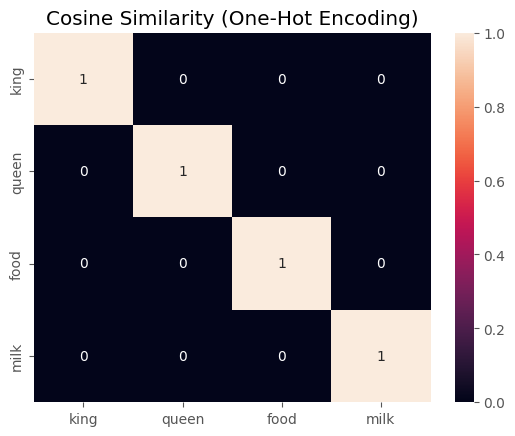

In [4]:
similarity_king_queen = cosine_similarity_custom(king_vector, queen_vector)
similarity_king_food = cosine_similarity_custom(king_vector, food_vector)
similarity_king_milk = cosine_similarity_custom(king_vector, milk_vector)

print(f"'king'과 'queen'의 유사도 (One-Hot): {similarity_king_queen}")
print(f"'king'과 'food'의 유사도 (One-Hot): {similarity_king_food}")
print(f"'king'과 'milk'의 유사도 (One-Hot): {similarity_king_milk}")

# 코사인 유사도 결과를 시각적으로 확인
cos_sim_matrix = cosine_similarity([king_vector, queen_vector, food_vector, milk_vector])

sns.heatmap(cos_sim_matrix, annot=True, xticklabels=vocab, yticklabels=vocab)
plt.title("Cosine Similarity (One-Hot Encoding)")
plt.show()

# 2. Word Embedding Example

### 2-1. Word2Vec

In [5]:
sentences = [
    ['king', 'queen', 'man', 'woman'],
    ['food', 'milk', 'bread', 'cheese'],
    ['king', 'man', 'queen', 'woman'],
    ['milk', 'cheese', 'bread', 'food'],
    ['king', 'man'],
    ['queen', 'woman'],
    ['food', 'bread'],
    ['milk', 'cheese']
]

# Word2Vec 모델 학습
word2vec = Word2Vec(sentences, vector_size=50, window=2, min_count=1, sg=0) # vector_size 50차원

'king'과 'queen'의 유사도 (Word2Vec): 0.11253499239683151
'king'과 'food'의 유사도 (Word2Vec): 0.04491342231631279
'king'과 'milk'의 유사도 (Word2Vec): -0.2187258005142212


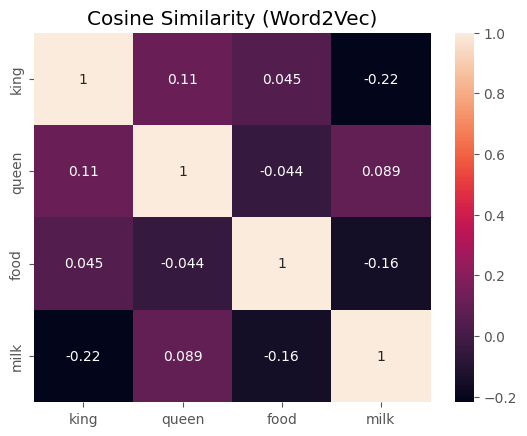

In [6]:
vocab = ['king', 'queen', 'food', 'milk']

corpus_embeddings = np.array([word2vec.wv[word] for word in vocab])

king_vector = corpus_embeddings[0]
queen_vector = corpus_embeddings[1]
food_vector = corpus_embeddings[2]
milk_vector = corpus_embeddings[3]

similarity_king_queen = cosine_similarity_custom(king_vector, queen_vector)
similarity_king_food = cosine_similarity_custom(king_vector, food_vector)
similarity_king_milk = cosine_similarity_custom(king_vector, milk_vector)

print(f"'king'과 'queen'의 유사도 (Word2Vec): {similarity_king_queen}")
print(f"'king'과 'food'의 유사도 (Word2Vec): {similarity_king_food}")
print(f"'king'과 'milk'의 유사도 (Word2Vec): {similarity_king_milk}")

# 코사인 유사도 결과를 시각적으로 확인
cos_sim_matrix = cosine_similarity([king_vector, queen_vector, food_vector, milk_vector])

sns.heatmap(cos_sim_matrix, annot=True, xticklabels=vocab, yticklabels=vocab)
plt.title("Cosine Similarity (Word2Vec)")
plt.show()

In [7]:
word2vec.wv.similarity(vocab[0], vocab[1])

0.11253498

In [8]:
word2vec.wv.most_similar('king')

[('woman', 0.13662855327129364),
 ('cheese', 0.13204145431518555),
 ('queen', 0.11253499239683151),
 ('food', 0.044913437217473984),
 ('man', 0.029596175998449326),
 ('bread', -0.17547552287578583),
 ('milk', -0.21872581541538239)]

In [9]:
word2vec.wv.most_similar('bread')

[('woman', 0.12486250698566437),
 ('queen', 0.07399576157331467),
 ('cheese', 0.04237300902605057),
 ('man', 0.018277151510119438),
 ('milk', 0.011071980930864811),
 ('food', -0.17424818873405457),
 ('king', -0.17547553777694702)]

In [10]:
word2vec.wv.most_similar(positive = ['king', 'queen'])

[('man', 0.14278708398342133),
 ('woman', 0.05390901118516922),
 ('cheese', 0.04846587032079697),
 ('food', 0.0005640055751428008),
 ('bread', -0.06803111732006073),
 ('milk', -0.08714812248945236)]

### 2-2. GloVe

In [20]:
import gensim.downloader as api

glove_vectors = api.load("glove-wiki-gigaword-200")
glove_vectors.save("glove-wiki-gigaword-200.kv")

[==================================================] 100.0% 252.1/252.1MB downloaded


In [11]:
from gensim.models import KeyedVectors

def load_saved_embedding_model(file_path):
    """ Load saved GloVe Vectors from file
        Args:
            file_path: path to the saved file
        Return:
            wv_from_bin: All embeddings loaded from file
    """
    wv_from_bin = KeyedVectors.load(file_path, mmap='r')
    print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))
    return wv_from_bin

# 파일에서 로드
glove = load_saved_embedding_model("glove-wiki-gigaword-200.kv")

Loaded vocab size 400000


In [12]:
vocab = ['king', 'queen', 'food', 'milk']

In [13]:
# Print the dimension of the GloVe vectors
print(f'Dimensions of the GloVe vectors: {glove.vectors.shape}')

# Sample corpus embedding from Glove
corpus_embeddings = np.array([glove[word] for word in vocab])

Dimensions of the GloVe vectors: (400000, 200)


'king'과 'queen'의 유사도 (GloVe): 0.6665197610855103
'king'과 'food'의 유사도 (GloVe): 0.22469617426395416
'king'과 'milk'의 유사도 (GloVe): 0.14077116549015045


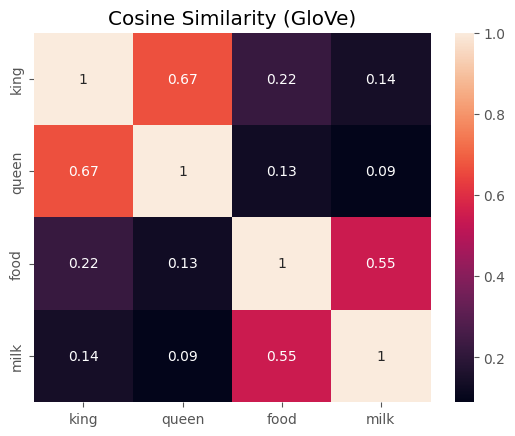

In [14]:
king_vector = corpus_embeddings[0]
queen_vector = corpus_embeddings[1]
food_vector = corpus_embeddings[2]
milk_vector = corpus_embeddings[3]

similarity_king_queen = cosine_similarity_custom(king_vector, queen_vector)
similarity_king_food = cosine_similarity_custom(king_vector, food_vector)
similarity_king_milk = cosine_similarity_custom(king_vector, milk_vector)

print(f"'king'과 'queen'의 유사도 (GloVe): {similarity_king_queen}")
print(f"'king'과 'food'의 유사도 (GloVe): {similarity_king_food}")
print(f"'king'과 'milk'의 유사도 (GloVe): {similarity_king_milk}")

# 코사인 유사도 결과를 시각적으로 확인
cos_sim_matrix = cosine_similarity([king_vector, queen_vector, food_vector, milk_vector])

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cos_sim_matrix, annot=True, xticklabels=vocab, yticklabels=vocab)
plt.title("Cosine Similarity (GloVe)")
plt.show()

In [15]:
pprint.pprint(glove.similarity('king', 'queen'))

0.6665197


In [16]:
pprint.pprint(glove.most_similar('king'))

[('prince', 0.6854567527770996),
 ('queen', 0.6665196418762207),
 ('kingdom', 0.6303210258483887),
 ('monarch', 0.6224350333213806),
 ('ii', 0.6146443486213684),
 ('throne', 0.6074705123901367),
 ('reign', 0.5911680459976196),
 ('iii', 0.583712637424469),
 ('crown', 0.579647958278656),
 ('emperor', 0.5552704334259033)]


In [17]:
pprint.pprint(glove.most_similar(positive=['king', 'queen'], negative = ['princess']))

[('monarch', 0.5550335049629211),
 ('ii', 0.502287745475769),
 ('kingdom', 0.5022493004798889),
 ('reign', 0.4935906231403351),
 ('throne', 0.47744500637054443),
 ('henry', 0.473604679107666),
 ('iii', 0.4697798490524292),
 ('vi', 0.45458969473838806),
 ('kings', 0.4501577615737915),
 ('crown', 0.44721829891204834)]


In [18]:
corpus_embeddings[0]

array([-0.49346  , -0.14768  ,  0.32166  ,  0.056899 ,  0.052572 ,
        0.20192  , -0.13506  , -0.030793 ,  0.15614  , -0.23004  ,
       -0.66376  , -0.27316  ,  0.10391  ,  0.57334  , -0.032355 ,
       -0.32766  , -0.2716   ,  0.32919  ,  0.41305  , -0.18085  ,
        1.5167   ,  2.1649   , -0.10278  ,  0.098019 , -0.018946 ,
        0.027292 , -0.7948   ,  0.36631  , -0.33151  ,  0.2884   ,
        0.10436  , -0.19166  ,  0.27326  , -0.17519  , -0.14986  ,
       -0.072333 , -0.54371  , -0.29728  ,  0.081491 , -0.42673  ,
       -0.36406  , -0.52035  ,  0.18455  ,  0.44121  , -0.32196  ,
        0.39172  ,  0.11952  ,  0.36979  ,  0.29229  , -0.42954  ,
        0.46653  , -0.067243 ,  0.31216  , -0.17216  ,  0.48874  ,
        0.2803   , -0.17577  , -0.35101  ,  0.020792 ,  0.15974  ,
        0.21927  , -0.32499  ,  0.086022 ,  0.38927  , -0.65638  ,
       -0.67401  , -0.41896  ,  1.2709   ,  0.20857  ,  0.28315  ,
        0.58238  , -0.14944  ,  0.3989   ,  0.52681  ,  0.3571

# Task 1: Word Embedding

### 1) 원하는 단어들 중 관련 없는 것 예측하고, 실제로 그것이 출력되는지 확인해보기


In [19]:
vocab_list = list(glove.index_to_key)

In [20]:
# 원하는 단어가 있는지 확인(소문자로 검색) - True
word = 'samsung'
print(word in vocab_list)

True


In [21]:
print(glove.doesnt_match("breakfast cereal dinner lunch".split())) # 4개 단어 중 연관이 없는 단어 1개 선택

cereal


In [22]:
print(glove.doesnt_match("samsung kaist yonsei".split()))

samsung


In [23]:
print(glove.doesnt_match("golf baseball dance".split()))

dance


In [24]:
# Do yourself
you = "computer snack keyboard mouse"
print(glove.doesnt_match(you.split()))

snack


### 2) 4개 이상의 단어들을 입력하고 유사도가 높은 단어들끼리 매칭되는지 결과 확인해보기

In [25]:
def cosine_similarity_custom(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def display_pca_scatterplot(model, words=None, sample=0):
    if words is None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [word for word in model.vocab]

    # 단어 벡터 추출
    word_vectors = np.array([model[w] for w in words])

    # PCA 수행
    pca = PCA(n_components=2)
    twodim = pca.fit_transform(word_vectors)[:, :2]

    # 단어 시각화
    plt.figure(figsize=(10, 10))
    plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, twodim):
        plt.annotate(word, (x, y), xytext=(x + 0.05, y + 0.05))

    # 유사한 단어 쌍 연결
    for i in range(len(words)):
        similarities = []
        for j in range(len(words)):
            if i != j:
                cos_sim = cosine_similarity_custom(word_vectors[i], word_vectors[j])
                similarities.append((cos_sim, i, j))
        # 가장 유사한 단어 쌍 찾기
        most_similar = max(similarities, key=lambda item: item[0])
        _, idx1, idx2 = most_similar
        plt.plot([twodim[idx1, 0], twodim[idx2, 0]], [twodim[idx1, 1], twodim[idx2, 1]], 'k--', linewidth=0.5)

    plt.show()

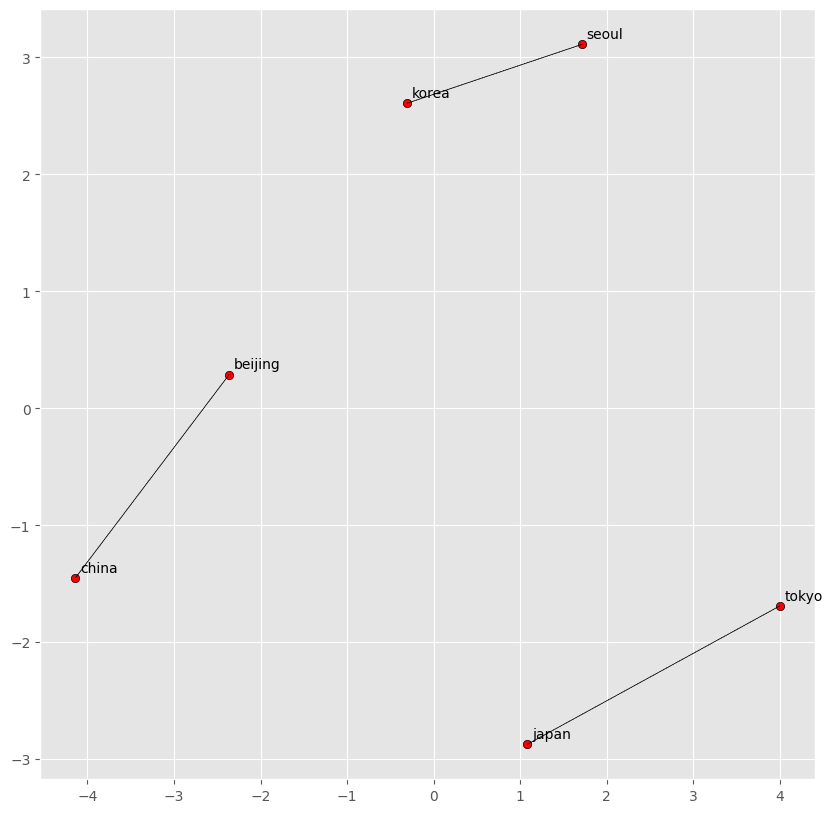

In [26]:
display_pca_scatterplot(glove,
    ['korea', 'seoul', 'japan', 'tokyo', 'china', 'beijing'])

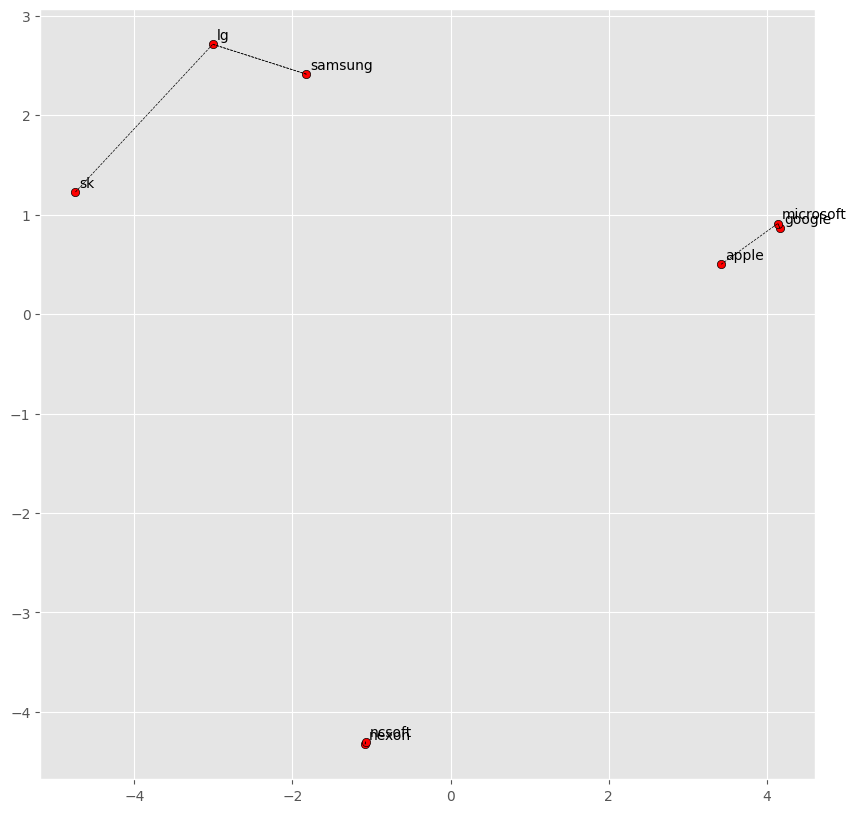

In [27]:
display_pca_scatterplot(glove,
    ['samsung', 'lg', 'sk', 'nexon', 'ncsoft', 'google', 'microsoft', 'apple'])

### 3) GloVe 빈칸 채워서 유사한 단어 찾기

In [30]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2024-08-15 12:16:28--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-08-15 12:16:29--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.08MB/s    in 2m 45s  

2024-08-15 12:19:15 (4.98 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [31]:
!unzip ./glove.6B.zip

Archive:  ./glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [32]:
import numpy as np

# GloVe 파일 로드 (다운로드된 파일 경로로 변경 필요)
glove_file = 'glove.6B.100d.txt'
embedding_dict = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            vector = np.asarray(values[1:], dtype='float32')
            if vector.shape[0] == 100:  # 벡터의 길이가 100인지 확인
                embedding_dict[word] = vector
        except ValueError:
            print(f"Error converting line to float: {line}")

# 단어 벡터 얻기
def get_word_vector(word):
    return embedding_dict.get(word, np.zeros((100,)))[:100]

# cosine 유사도 계산
def cosine_similarity_custom(vec1, vec2):
    # Do yourself!
    similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    return similarity

# 유사한 단어 찾기 함수 (코사인 유사도)
def find_similar_words(word, top_n=5):
    target_vector = get_word_vector(word)
    similarities = {}
    for w, vec in embedding_dict.items():
        if word == w:
          continue
        similarities[w] = cosine_similarity_custom(target_vector, vec)

    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

# 특정 단어와 유사한 단어들 찾기
similar_words_glove = find_similar_words('starcraft')
print(f"similarity word (GloVe): {similar_words_glove}")


similarity word (GloVe): [('warcraft', 0.76388866), ('everquest', 0.6020596), ('shenmue', 0.5900681), ('kombat', 0.57015586), ('dota', 0.5611353)]
